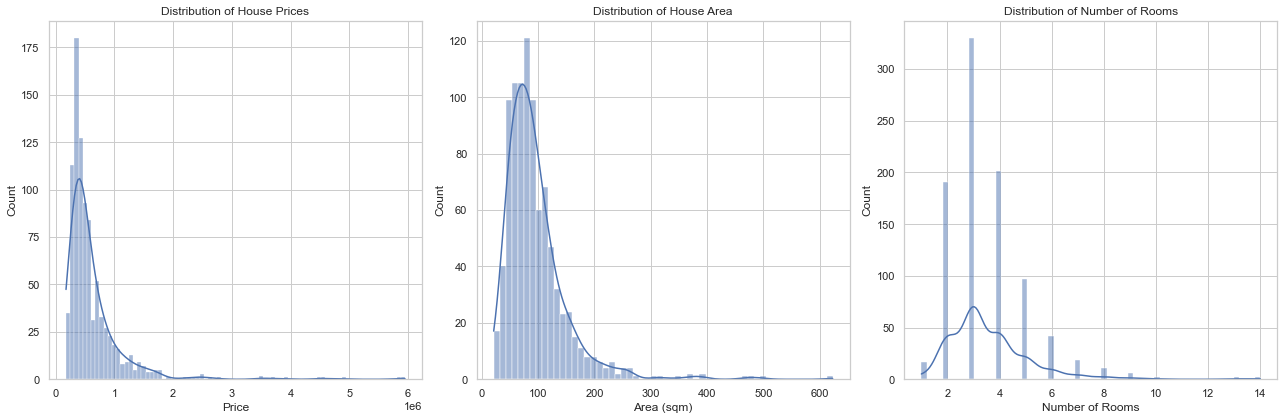

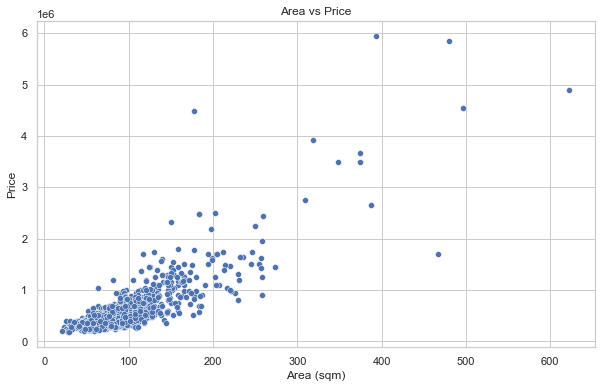

Mean Absolute Error (MAE): 399995531738146.2
Mean Squared Error (MSE): 2.004970490707296e+31
Root Mean Squared Error (RMSE): 4477689684097476.5


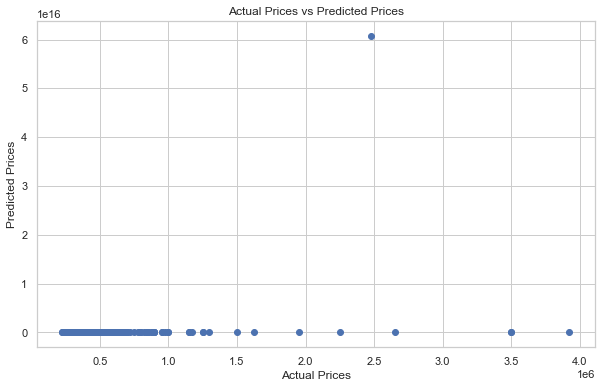

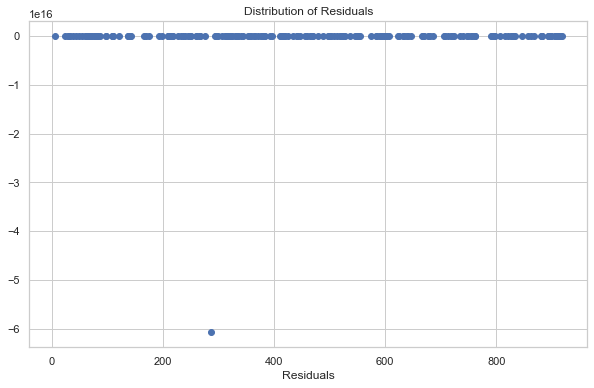

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = "C:/Users/Lenovo/Downloads/HousingPrices-Amsterdam-August-2021.csv"
data = pd.read_csv(file_path)
data_cleaned = data.dropna(subset=['Price'])

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data_cleaned['Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of House Prices')
axes[0].set_xlabel('Price')
sns.histplot(data_cleaned['Area'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of House Area')
axes[1].set_xlabel('Area (sqm)')
sns.histplot(data_cleaned['Room'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Number of Rooms')
axes[2].set_xlabel('Number of Rooms')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data_cleaned)
plt.title('Area vs Price')
plt.xlabel('Area (sqm)')
plt.ylabel('Price')
plt.show()


encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data_cleaned[['Zip']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Zip']))
data_encoded = pd.concat([data_cleaned, encoded_df], axis=1).drop('Zip', axis=1)
data_encoded = data_encoded.dropna()
features = data_encoded.drop(columns=['Unnamed: 0', 'Address', 'Price'])
target = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(residuals.index, residuals.values)
plt.xlabel('Residuals') 
plt.title('Distribution of Residuals')
plt.show()

In [8]:
residuals

382   -8.755181e+13
883   -8.755181e+13
357   -8.755181e+13
359   -8.755181e+13
364   -8.755181e+13
           ...     
893   -8.755181e+13
585    5.516309e+05
880   -3.406464e+05
713   -2.531558e+04
797   -8.755181e+13
Name: Price, Length: 184, dtype: float64